## 1. 결정 트리

결정 트릐(Decision Tree)는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘이다.  
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것  
-> 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적으로 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.

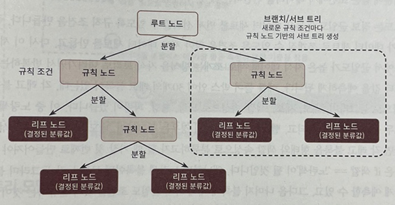  
다음은 결정 트리의 구조를 간략하게 나타낸 것이다.  
  
`규칙 노드(Decision Node)`로 표시된 노드 =  **규칙 조건**  
`리프 노드(Leaf Node)`로 표시된 노트 = **결정된 클래스**  
  
새로운 규칙 조건 마다 `서브 트리(Sub Tree)` 가 생성됨  
데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다. 하지만 많은 규칙이 있다는 것은 곧 분류의 결정 방식이 복잡해진다는 것이고 이는 결국 **과적합**으로 이어지기 쉽다  
  
가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다.  
  
결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.  
  
***
* `정보 이득(Information Gain) 지수` : $ 1 - \text{entropy} $  
엔트로피 = 주어진 데이터 집합의 혼잡도  
1. 서로 다른 값이 섞여 있다 -> 엔트로피가 높다  
2. 같은 값이 섞여 있다 -> 엔트로피가 낮다  
**정보 이득이 높은 속성을 기준으로 결정 트리는 분할 기준을 정한다**  
  
  
* `지니 계수` : 0 ~ 1 => 평등 ~ 불평등  
1. 지니 계수가 낮다 -> 균일도가 높다  
2. 지니 계수가 높다 -> 균일도가 낮다  
  
DecisionTreeClassifier는 기본으로 `지니 계수`를 이용하여 데이터 세트를 분할한다.  

### 결정 트리 모델의 특징

* 장점  
정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적  
피처 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음  

  
* 단점  
과적합으로 정확도가 떨어짐  
이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

### 결정 트리 모델의 시각화(Decision Tree Visualization)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import numpy as np
%matplotlib inline

dt_clf = DecisionTreeClassifier(random_state = 156)

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

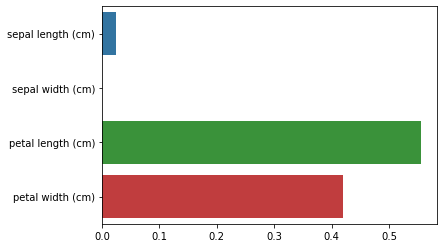

In [10]:
# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris.feature_names)

여러 피처들 중 `petal_length` 피처가 가장 중요함을 알 수 있다.

### 결정 트리 과적합(Overfitting)

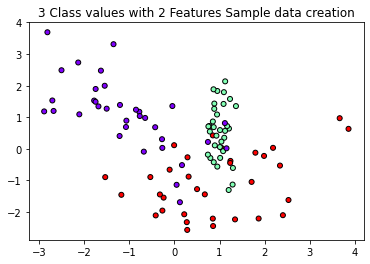

In [22]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                          n_classes = 3, n_clusters_per_class = 1, random_state = 0)

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')
plt.title("3 Class values with 2 Features Sample data creation")
plt.show()

각 피처가 X, Y 축으로 나열된 2차원 그래프이며, 3개의 클래스 값 구분은 색깔로 되어있다.  
이를 기반으로 결정 트리에 대해 알아보자.

In [27]:
import numpy as np

# Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:,0], X[:,1], c = y, s = 25, cmap = 'rainbow', edgecolor = 'k', 
              clim = (y.min(), y.max()), zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 학습
    model.fit(X, y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

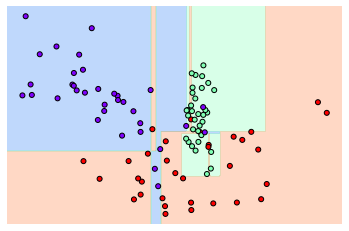

In [28]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치(Outer) 데어타까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐.  
  
결정 트리의 기본 하이퍼 파라미터 설정은 리프 노트 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해짐  
  
이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 현저히 떨어짐 (비효율적)

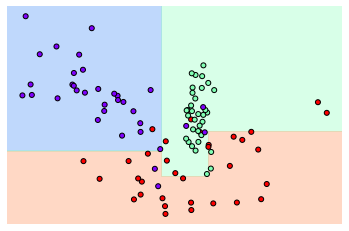

In [29]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에서 크게 반응하지 않으면서 더 일반화된 분류 규칙에 따라 분류가 되었다.  
  
다양한 테스트 데이터 세트를 기반으로 한 결정 트리 모델의 예측 성능은 **트리 생성 조건을 제약한 모델이 더 뛰어날 가능성이 높다**  
-> 테스트 데이터 세트는 학습 데이터 세트와는 다른 데이터 세트인데, 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 데이터 세트에서 정확도를 떨어뜨릴 수 있기 때문

### 결정 트리 실습 - Human Activity Recognition

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name = pd.read_csv('data_set/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

feature_n = feature_name.iloc[:,1].values.tolist()
print('전체 피쳐명에서 10개만 추출', feature_n[:10])

전체 피쳐명에서 10개만 추출 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [74]:
# 중복된 피\처명 확인
feature_dup = feature_name.groupby('column_name').count()
print('중복된 피처 개수 :',(feature_dup[feature_dup['column_index']>1].count())[0])
feature_dup[feature_dup['column_index']>1].head()

중복된 피처 개수 : 42


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


42개의 피처명이 중복되었다.  
각 중복된 피처들을 분류하기 위해 원본 피처며에 _1, _2 를 추가하여 새로운 피처를 가지는 DataFrame을 반환하는 함수 `get_new_feature_name_df()` 지정

In [75]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

이제 train 디렉터리에 있는 학습용 피처 데이터 세트와 레이블 데이터 세트, test 디렉터리에 있는 테스트용 피처 데이터 파일과 레이블 데이터 파일을 각각 학습/테스트용 DataFrame 에 로드

In [85]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('data_set/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('data_set/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('data_set/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('data_set/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('data_set/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [86]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [87]:
# 레이블 데이터의 값 분포 확인
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


DecisionTreeClassifier를 이용해 동작 예측 분류를 수행해보자

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))
print('')

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


결정 트리의 트리 깊이(Tree Depth)가 에측 정확도에 주는 영향을 살펴보자

In [92]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.7min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


5개의 CV 세트에서 max_depth 값에 따라 어떻게 예측 성능이 변했는지 GridSearchCV 객체의 `cv_result_` 속성을 통해 살펴보자

In [97]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 확인
cv_results[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


`mean_test_score`는 5개의 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치이다.  
`max_depth` = 8 일때 정확도가 0.852로 가장 높다. 이 수치를 넘어가면 정확도가 떨어진다.  
  
결정 트리는 더 완벽한 규칙을 학습 데이터 세트에 적용하기 위해 노드를 지속적으로 분할하면서 깊이가 깊어지고 더욱 더 복잡한 모델이 된다.  
깊어진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져올지 모르지만, 검증 데이터 세트에는 오히려 과적합으로 성능이 저하될 수 있다.

별도의 테스트 데이터 세트에서 결정 트리의 정확도를 예측해보자

In [99]:
max_depths = [6,8,10,12,16,20,24]

# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


`max_depth` = 8 일때 정확도가 87.07%로 가장 높다.  
  
  
max_depth와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝해보자

In [100]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.0min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


`max_depth` = 8, `min_samples_split` = 16일때 정확도가 약 85.5%로 가장 높다.  
  
별도 분리된 테스트 데이터 세트에 해당 하이퍼 파라미터를 적용해보자

In [103]:
best_df_clf = grid_cv.best_estimator_
pred_1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred_1)
print('결정 트리 예측 정확도 :{0:.4f}'.format(accuracy))

결정 트리 예측 정확도 :0.8717


`max_depth` = 8, `min_samples_split` = 16일때 테스트 데이터의 정확도는 약 87.17%이다.  
  
중요도가 높은 순으로 Top 20 피처를 막대그래프로 시각화

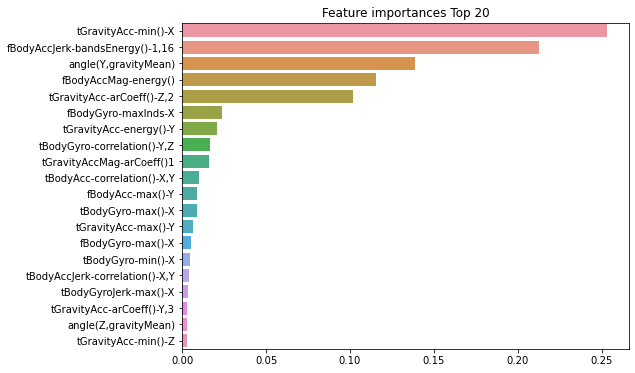

In [104]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()